In [2]:
from keras.datasets import fashion_mnist

In [4]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [22]:
x_train=x_train.reshape(60000,28,28,1)

In [23]:
x_test.shape

(10000, 28, 28)

In [24]:
x_test=x_test.reshape(10000,28,28,1)

In [25]:
y_train.shape

(60000,)

In [26]:
y_test.shape

(10000,)

In [27]:
import numpy as np

In [28]:
n=len(np.unique(y_train))

In [29]:
n

10

In [30]:
import matplotlib.pyplot as plt

In [31]:
k=x_train[1000]

In [32]:
k.shape

(28, 28, 1)

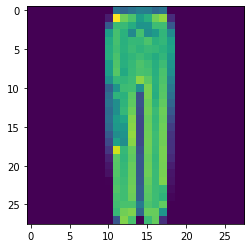

In [33]:
plt.imshow(k)

In [34]:
np.unique(x_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [49]:
def baseline_model():
    model=Sequential()
    model.add(Conv2D(filters=32,kernel_size=(5,5),padding="same",strides=(2,2),activation="relu",
                     kernel_initializer="he_uniform",input_shape=(28,28,1)))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))
    model.add(Conv2D(filters=16,kernel_size=(5,5),padding="same",strides=(2,2),activation="relu",
                     kernel_initializer="he_uniform"))
    model.add(MaxPool2D(2,2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(32,activation="relu",kernel_initializer="he_uniform",))
    model.add(Dropout(0.2))
    model.add(Dense(16,activation="relu",kernel_initializer="he_uniform"))
    model.add(Dropout(0.2))
    model.add(Dense(n,activation="softmax"))
    opt=Adam(learning_rate=0.001)
    model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=["accuracy"])
    return model
    
              
              
    

In [50]:
model=baseline_model()

In [51]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [52]:
y_train.shape

(60000, 10)

In [53]:
y_test.shape

(10000, 10)

In [54]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [68]:
history=model.fit(x_train,y_train,verbose=1,epochs=30,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/30
938/938 [==============================] - 20s 21ms/step - loss: 0.7156 - accuracy: 0.7327 - val_loss: 0.5937 - val_accuracy: 0.7702
Epoch 2/30
938/938 [==============================] - 20s 21ms/step - loss: 0.7088 - accuracy: 0.7361 - val_loss: 0.5756 - val_accuracy: 0.7842
Epoch 3/30
938/938 [==============================] - 20s 21ms/step - loss: 0.6944 - accuracy: 0.7430 - val_loss: 0.5683 - val_accuracy: 0.7859
Epoch 4/30
938/938 [==============================] - 20s 21ms/step - loss: 0.6855 - accuracy: 0.7461 - val_loss: 0.5619 - val_accuracy: 0.7901
Epoch 5/30
938/938 [==============================] - 20s 21ms/step - loss: 0.6677 - accuracy: 0.7527 - val_loss: 0.5447 - val_accuracy: 0.7932
Epoch 6/30
938/938 [==============================] - 20s 21ms/step - loss: 0.6538 - accuracy: 0.7564 - val_loss: 0.5270 - val_accuracy: 0.8027
Epoch 7/30
938/938 [==============================] - 20s 21ms/step - loss: 0.6402 - accuracy: 0.7609 - val_loss: 0.5306 - val_accuracy:

In [69]:
# model.predict_classes(k)

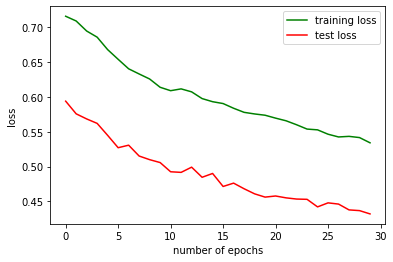

In [70]:
plt.plot(history.history["loss"],label="training loss",color="green")
plt.plot(history.history["val_loss"],label="test loss",color="red")
plt.xlabel("number of epochs")
plt.ylabel("loss")
plt.legend()